# PCA

## Unsupervised Learning
## PCA (Linear Dimension Reduction)

- PCA可以幹嘛? 就寶可夢這個例子而言

 1. 投影降維度，6維沒辦法畫圖，投影到2維平面畫圖看資料，不是6個參數挑2個，而是你想要幾個Componet，且每個Component還是包含6維的資訊
 2. 對Component的參數進行解釋
 3. Outlier分析

In [1]:
%pylab inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### 讀資料

In [3]:
df = pd.read_csv('Pokemon.csv')

### 重新命名column name

In [4]:
columns = df.columns.tolist()
columns[0] = 'id'
df.columns = columns

In [5]:
df.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 做feature transform (PCA要先做feature transform，出來的結果才不會怪怪的)

In [6]:
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
scaler = StandardScaler().fit(df[cols])
df_scaled = scaler.transform(df[cols])

### 看看mean和std，應該是mean = 0, std=1

In [7]:
print df_scaled[:, 0].mean()
print df_scaled[:, 0].std()

-2.48689957516e-16
1.0


### 跑PCA

In [8]:
pca = PCA(n_components=6)
pca.fit(df_scaled)

PCA(copy=True, n_components=6, whiten=False)

### 第5和6的作用比較小，project出來的variance(eigenvalue)是很小的，選前四個就可以

In [9]:
print 'eigenvalue ratio = %s ' % (pca.explained_variance_ratio_)

eigenvalue ratio = [ 0.45190665  0.18225358  0.12979086  0.12011089  0.07142337  0.04451466] 


### 算一下轉到PC世界的值

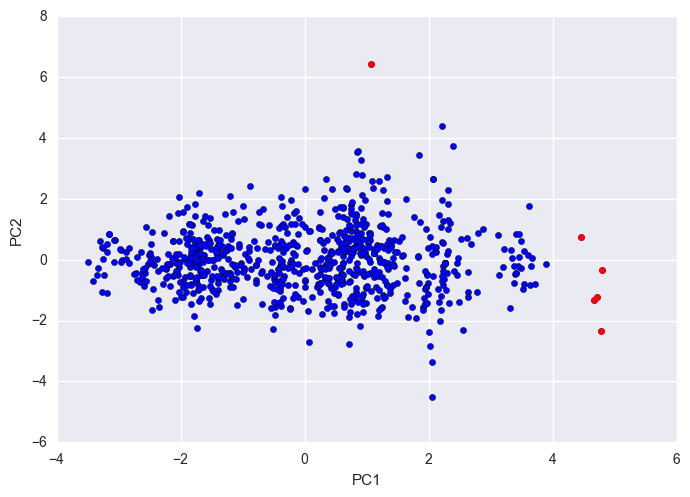

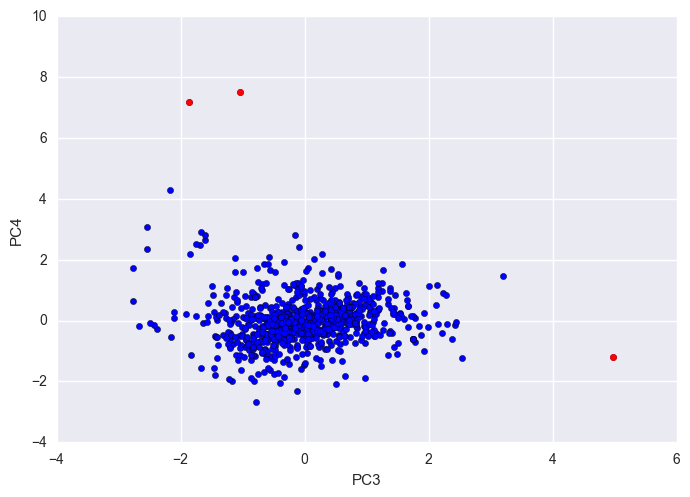

In [12]:
pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

plt.scatter(pcscores.PC1, pcscores.PC2)
plt.scatter(pcscores.PC1[pcscores.PC1>4], pcscores.PC2[pcscores.PC1>4], color='red') #PC1大於4
plt.scatter(pcscores.PC1[pcscores.PC2>6], pcscores.PC2[pcscores.PC2>6], color='red') #PC2大於6
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(pcscores.PC3, pcscores.PC4)
plt.scatter(pcscores.PC3[pcscores.PC3>4], pcscores.PC4[pcscores.PC3>4], color='red') #PC3大於4
plt.scatter(pcscores.PC3[pcscores.PC4>6], pcscores.PC4[pcscores.PC4>6], color='red') #PC4大於6
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

### 看看PC1前五名是誰?

In [14]:
print 'PC1 Top 5'
best = pcscores.sort_values(by='PC1', ascending=False)[:5]
df.loc[best.index]

PC1 Top 5


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


### 看看權重(eigenvector)

- http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/dim%20reduction%20(v5).pdf#page=26

- 像是我們不會說小傑是強化系(以偏概全)，會說他有0.7強化系，0.25放出系，0.05變化系

- PC1每一個dimension都是正的，這代表了寶可夢的強度
- 如果你要產生一隻寶可夢，就是用這四個component(PC1~PC4)做linear combination的結果
- 如果你給PC1的weight比較大，就是表示這隻寶可夢的六維(HP, Atk...)都是大的

- 今天你給PC2比較大的weight的時候，你會增加那隻寶可夢的防禦力，但是速度會降低

- 如PC3是表示特殊防禦上升但攻擊和生命降低

- 如PC4是表示生命力強但攻擊、防禦和速度會降低

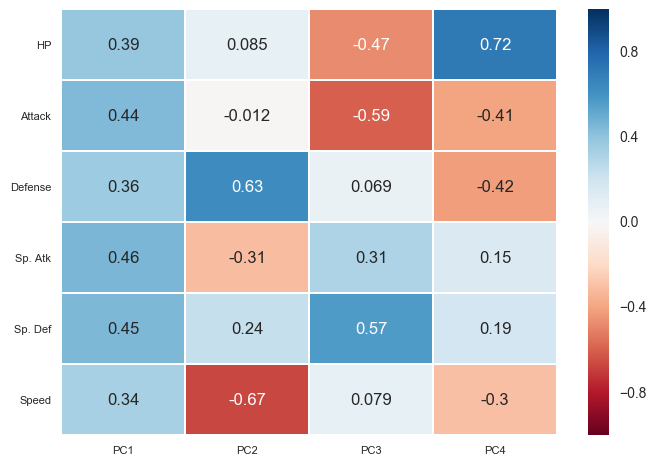

In [11]:
loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
                  
ax = sns.heatmap(loadings.loc['PC1':'PC4', :].transpose(), center=0, linewidths=0.5, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)